<h1 style="text-align:center">Travail pratique numérique en thermodynamique statistique</h1>
<h2 style="text-align:center">PARTIE 2 : Modèle de Drude</h2>

Veuillez indiquer le nom des membres de votre équipe dans la cellule suivante.

# Introduction # 
Cette deuxième partie du travail implémente une simulation 2D du modèle de Drude pour décrire le mouvement des électrons libres et indépendants dans les métaux. Des sphères dures sont encore utilisées pour représenter les particules, mais maintenant de deux types différents afin de différencier les coeurs ioniques immobiles des électrons sur leurs trajectoires balistiques. Les collisions entre les deux doivent donc être inélastiques. Les questions sur cette simulation, d'abord de cinétique puis de dynamique des électrons en présence d'une force externe appliquée au cristal, vérifieront quelques résultats analytiques du modèle de Drude obtenus en classe et/ou dans le manuel de cours Ashcroft/Mermin.

- **La remise du présent _Jupyter Notebook_ ET celui de la 1<sup>re</sup> partie, ainsi que tout autre fichier de code produit, se fait sur Gradescope en n'oubliant pas d'y indiquer tous les membres de votre équipe.**

# 2<sup>e</sup> partie - Modèle de Drude #

Faites une copie du script `tds2Danimation_hXX.py` et modifiez-le pour obtenir une simulation cinétique d'un gaz d'électrons libres dans la matière cristalline selon le modèle de Drude. Spécifiquement selon les pp.4-6 du manuel Ashcroft/Mermin,
1. ajoutez un deuxième type de sphères fixes réparties périodiquement dans la boîte d'animation: celles-ci représenteront les coeurs ioniques,
2. éliminez les collisions entre les sphères mobiles qui représentent maintenant les électrons de conduction indépendants et libres,
3. en faisant appel à la température du gaz, ajoutez des collisions inélastiques entre les électrons libres et les coeurs ioniques fixes. La quantité de mouvement $\vec{p}$ n'est alors PAS conservée et il faut appliquer les hypothèses spécifiques du modèle de Drude à la sortie de chaque collision, notamment: 
- la direction de $\vec{p}$ doit être aléatoire,
- la norme $||\vec{p}||$ est déterminée par la distribution de Maxwell-Boltzmann.

### Votre simulation ###

VII. _(25 points)_ &mdash; Écrivez un appel de votre nouveau script pour l'exécuter avec la cellule suivante:

In [1]:
#%run tds2Danimation_drude_h25.py


### Question statistique ###

VIII. _(5 points)_ &mdash; Vérifiez numériquement et graphiquement que l'amortissement de la quantité de mouvement moyenne des électrons suit l'équation exponentielle dérivée analytiquement en classe, soit $\langle p(t)\rangle =\langle p(t_0)\rangle \,e^{-t/\tau}$, et comparez-y le comportement d'un seul électron.

<IPython.core.display.Javascript object>

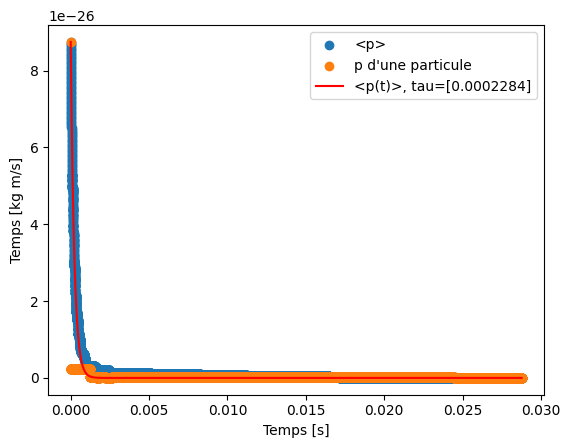

In [1]:
from part2_viii_data import avg_p, particule_a_suivre_p
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

def avg_p_analytic(t, tau):
    return avg_p[0] * np.exp(-t/tau)

x = np.array([i*1e-6 for i in range(len(avg_p))])

(tau_fit), _ = curve_fit(avg_p_analytic, x, avg_p)

plt.scatter(x, avg_p, label="<p>")
plt.scatter(x, particule_a_suivre_p, label="p d'une particule")
plt.plot(x, avg_p_analytic(x, tau_fit), color='red', label=f"<p(t)>, tau={tau_fit}")
plt.xlabel("Temps [s]")
plt.ylabel("Temps [kg m/s]")
plt.legend()

### Dynamique sous l'effet d'une force externe ###

IX. _(10 points)_ &mdash; Pour passer de la cinétique à la dynamique des électrons libres, modifiez votre code de simulation en ajoutant une fonction qui applique un champ électrique uniforme. Celui-ci devra être de module ajustable et perpendiculaire à deux des côtés de la boîte. À chaque pas de temps $\mathrm{d}t$ sans collision, les électrons devront donc accélérer d'un incrément $\mathrm{d}p_x$ dicté par la force de Coulomb à leur position.

Copiez le code de votre fonction dans la cellule qui suit en n'oubliant pas d'inclure votre fichier Python (`.py`) modifié avec la simulation complète lors de la remise.

In [8]:
"""
electron_charge = 1.6e-19
electric_field = vector(2e-16, 0, 0)
p[i] += electron_charge * electric_field
"""

'\nelectron_charge = 1.6e-19\nelectric_field = vector(2e-16, 0, 0)\np[i] += electron_charge * electric_field\n'

### Question statistique ###

X. _(5 points)_ &mdash; Pour quelques différents modules de champ électrique, présentez graphiquement l'évolution de la position moyenne des électrons en fonction du temps pour ses deux composantes parallèle et perpendiculaire au champ.

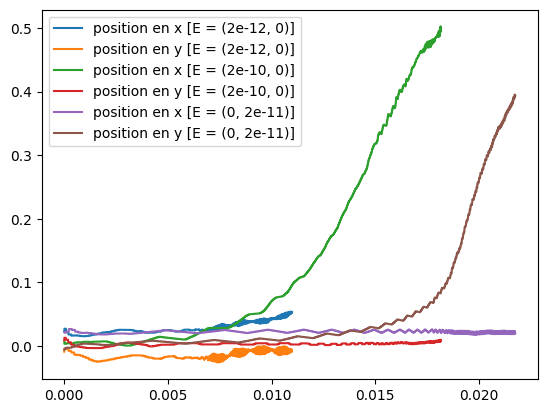

In [8]:
from part2_x_1_data import average_position as average_position_1
from part2_x_2_data import average_position as average_position_2
from part2_x_3_data import average_position as average_position_3

t_1 = [i*1e-6 for i in range(len(average_position_1))]
t_2 = [i*1e-6 for i in range(len(average_position_2))]
t_3 = [i*1e-6 for i in range(len(average_position_3))]

plt.plot(t_1, [pos.x for pos in average_position_1], label="position en x [E = (2e-12, 0)]")
plt.plot(t_1, [pos.y for pos in average_position_1], label="position en y [E = (2e-12, 0)]")
plt.plot(t_2, [pos.x for pos in average_position_2], label="position en x [E = (2e-10, 0)]")
plt.plot(t_2, [pos.y for pos in average_position_2], label="position en y [E = (2e-10, 0)]")
plt.plot(t_3, [pos.x for pos in average_position_3], label="position en x [E = (0, 2e-11)]")
plt.plot(t_3, [pos.y for pos in average_position_3], label="position en y [E = (0, 2e-11)]")


plt.legend()

# Médiagraphie #
- P. Drude, _Zur Elektronentheorie der Metalle; I Teil_, Annalen der Physik **306**(3), pp.566–613 (1900) https://doi.org/10.1002/andp.19003060312
- P. Drude, _Zur Elektronentheorie der Metalle; II Teil. Galvanomagnetische und Thermomagnetische Effecte_, Annalen der Physik **308**(11), pp.369–402 (1900) https://doi.org/10.1002/andp.19003081102
- P. Drude, _Zur Elektronentheorie der Metalle; Berichtigung_, Annalen der Physik **312**(3), pp.687–692 (1902) https://doi.org/10.1002/andp.19023120312
- H. A. Lorentz, _The Motion of Electrons in Metallic Bodies I_, Proc. of Koninklijke Akademie van Wetenschappen **7**, pp.438-453 (1905) https://dwc.knaw.nl/DL/publications/PU00013989.pdf
- H. A. Lorentz, _The Motion of Electrons in Metallic Bodies II_, Proc. of Koninklijke Akademie van Wetenschappen **7**, pp.585-593 (1905) https://dwc.knaw.nl/DL/publications/PU00014010.pdf
- H. A. Lorentz, _The Motion of Electrons in Metallic Bodies III_, Proc. of Koninklijke Akademie van Wetenschappen **7**, pp.684-691 (1905) https://dwc.knaw.nl/DL/publications/PU00014024.pdf
 - La simulation utilise la librairie <a href="https://vpython.org">VPython</a> conçue pour la visualisation de physique en 3D, avec les instructions d’installation <a href="https://vpython.org/presentation2018/install.html">ici</a> et la documentation <a href="https://www.glowscript.org/docs/VPythonDocs/index.html">ici</a>. Le script fourni qui est exécuté dans ce _Notebook_ adapte en 2D et commente en détail l’exemple <a href="https://www.glowscript.org/#/user/GlowScriptDemos/folder/Examples/program/HardSphereGas-VPython">HardSphereGas-VPython</a> du site interactif <a href="https://www.glowscript.org">GlowScript</a> pour programmer des animations avec VPython directement en ligne.
 
_**N.B. de débogage VPython:** Ayant plus codé en MATLAB qu'en Python jusqu'à maintenant, j'utilise Spyder qui offre une interface similaire, mais j'ai trouvé ce vidéo qui parle d'une <a href="https://www.youtube.com/watch?v=MJiVtz4Uj7M">installation VS code</a> qui peut-être aider? N'hésitez pas à partager de meilleures alternatives que j'ajouterai ici. Vous pouvez aussi tenter l'installation <a href="https://jakevdp.github.io/blog/2017/12/05/installing-python-packages-from-jupyter/">directement dans le Notebook</a>, mais au final chaque installation de distribution Python a son lot de <a href="https://xkcd.com/2347/">défis avec les dépendances</a>. Si rien ne fonctionne, n'hésitez pas à contacter la sympathique communauté qui développe et utilise cette librairie VPython d'abord via leur <a href="https://groups.google.com/g/vpython-users">groupe-forum</a>, puis leur <a href="https://github.com/vpython/vpython-jupyter">site GitHub</a> de dépôt de développement. J'ai toujours eu de bonnes expériences d'interaction avec eux!_ 
 